In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

terran_data = read_csv('../Output/terranFeb.csv', header=0, index_col=False)
display(terran_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,1,World of Sleepers LE,us,437,T,P,0.0,1,0,Player 1 - INnoVation (Terran),...,0,0,0,0,0,0,0,0,0,1
1,1,World of Sleepers LE,us,437,T,P,235.2,480,30,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
2,1,World of Sleepers LE,us,437,T,P,394.8,960,60,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
3,1,World of Sleepers LE,us,437,T,P,400.4,1440,90,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
4,1,World of Sleepers LE,us,437,T,P,299.6,1920,120,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69856,3455,Eternal Empire LE,eu,1610,T,Z,319.2,33600,2100,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,11,0
69857,3455,Eternal Empire LE,eu,1610,T,Z,459.2,34080,2130,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,11,0
69858,3455,Eternal Empire LE,eu,1610,T,Z,338.8,34560,2160,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,12,0
69859,3455,Eternal Empire LE,eu,1610,T,Z,319.2,35040,2190,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,10,0


In [2]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(terran_data) if x not in no_standardize]

#Standardizing these columns
stand = terran_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
terran_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))
terran_data_standardized = terran_data_standardized.join(terran_data['win'])

#Displaying first and last 5 rows
display(terran_data_standardized.head(5), terran_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-3.003363,-1.415927,-1.237729,-1.174913,-0.514795,-2.048131,-1.612501,-1.191799,-0.970655,-0.523886,...,0,0,0,0,0,1,1,0,0,1
1,-0.620782,-1.369031,-1.204103,-1.174913,-0.514795,-1.180274,-1.283774,-1.182962,-0.970655,-0.523886,...,0,0,0,0,0,1,1,0,0,1
2,0.995970,-1.275239,-1.170476,-1.070870,-0.485305,-1.180274,-1.174198,-1.147613,-0.970655,-0.523886,...,0,0,0,0,0,1,1,0,0,1
3,1.052698,-1.181446,-1.136850,-1.070870,-0.347684,-1.013148,-1.009834,-1.129939,-0.970655,-0.523886,...,0,0,0,0,0,1,1,0,0,1
4,0.031592,-1.134550,-1.120037,-1.070870,0.183139,-1.146849,-1.174198,-1.107846,-0.970655,-0.523886,...,0,0,0,0,0,1,1,0,0,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
69856,0.230140,0.928880,1.368305,1.66025,0.261779,-0.277797,1.346044,1.675877,1.136455,5.354281,...,0,0,0,1,0,0,0,0,1,0
69857,1.648343,0.131646,1.048856,1.66025,-0.475475,-1.213699,-0.188016,1.605180,1.454510,5.658517,...,0,0,0,1,0,0,0,0,1,0
69858,0.428689,-0.055939,0.880724,1.66025,-0.278874,-0.745748,-0.955046,1.565412,1.441257,5.802412,...,0,0,0,1,0,0,0,0,1,0
69859,0.230140,-0.243524,0.460396,1.46517,0.576341,-0.077247,-0.900258,1.194249,0.778644,6.202194,...,0,0,0,1,0,0,0,0,1,0
69860,-3.003363,-0.243524,0.796659,1.46517,-0.528557,-0.277797,0.798165,1.234017,0.897914,6.202194,...,0,0,0,1,0,0,0,0,1,0


In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_standardized) if x not in no_X]

Y = terran_data_standardized['win']
X_standardized = terran_data_standardized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(terran_data_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [5]:
X_train = terran_data_standardized[0:num_train]
X_val = terran_data_standardized[num_train:(num_train + num_val)]
X_test = terran_data_standardized[(num_val + num_train):]

In [6]:
Y_train.shape

(44711,)

In [7]:
X_train.shape

(44711, 132)

In [8]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [10]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(terran_data_standardized[:w1.total_window_size])])



example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 132)
Inputs shape: (1, 15, 132)
labels shape: (1, 15, 1)


In [12]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [standardized]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

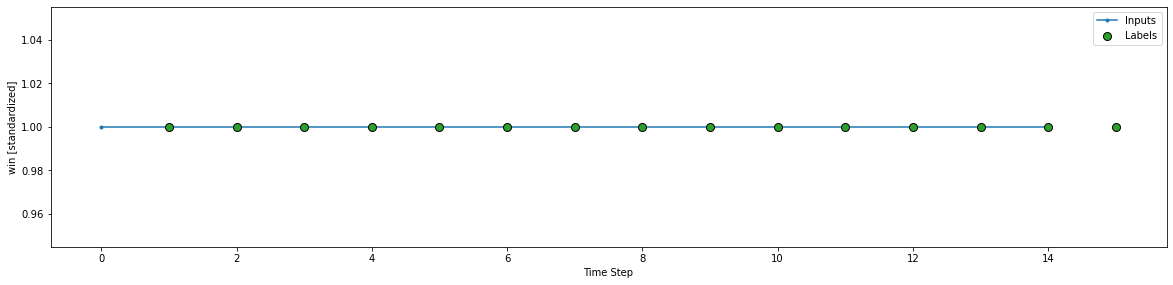

In [13]:
w1.example = example_inputs, example_labels
w1.plot()

In [14]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [15]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [17]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [18]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

In [19]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [20]:
val_performance = {}
performance = {}

history_linear = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=2)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
1397/1397 [=====================

1397/1397 [==============================] - 2s 2ms/step - loss: 0.0709 - binary_accuracy: 0.9853 - precision: 0.9849 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0684 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9912
Epoch 27/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0708 - binary_accuracy: 0.9853 - precision: 0.9849 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0684 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9912
Epoch 28/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0708 - binary_accuracy: 0.9853 - precision: 0.9849 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0684 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9914
Epoch 29/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0708 - binary_accuracy: 0.9853 - precision: 0.9849 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0684 - val_bina

Epoch 55/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0683 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9915
Epoch 56/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9914 - val_loss: 0.0683 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9916
Epoch 57/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0708 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.0682 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9917
Epoch 58/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.06

1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.0682 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9916
Epoch 85/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.0683 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9915
Epoch 86/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.0682 - val_binary_accuracy: 0.9863 - val_precision: 0.9874 - val_recall: 0.9872 - val_auc: 0.9916
Epoch 87/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0707 - binary_accuracy: 0.9853 - precision: 0.9848 - recall: 0.9850 - auc: 0.9915 - val_loss: 0.0682 - val_bina

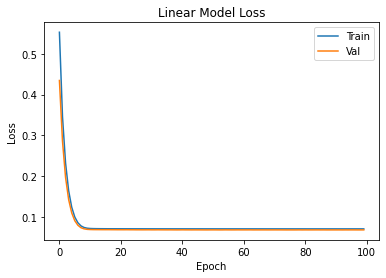

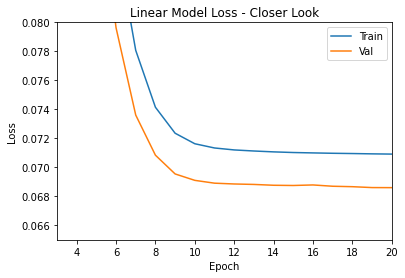

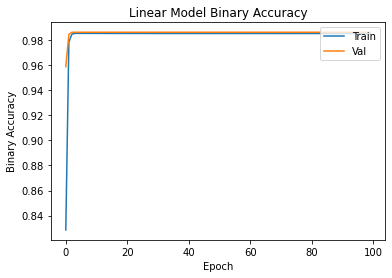

In [21]:
import matplotlib.pyplot as plt

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.065,0.08)
plt.xlim(3,20)
plt.show()

#Linear Model Binary Accuracy
plt.plot(history_linear.history['binary_accuracy'])
plt.plot(history_linear.history['val_binary_accuracy'])
plt.title('Linear Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

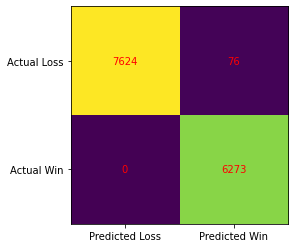

In [45]:
#Confusion matrix for Test set using Linear model 

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, linear.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

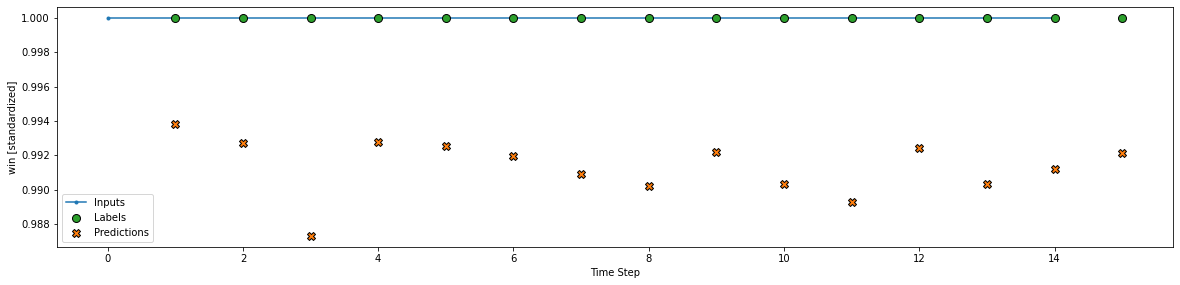

In [22]:
#Linear

wide_window.plot(linear)

In [23]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history_dense = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1397/1397 [==============================] - 4s 3ms/step - loss: 0.1703 - binary_accuracy: 0.9439 - precision_1: 0.9512 - recall_1: 0.9330 - auc_1: 0.9859 - val_loss: 0.0491 - val_binary_accuracy: 0.9863 - val_precision_1: 0.9874 - val_recall_1: 0.9872 - val_auc_1: 0.9984
Epoch 2/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0423 - binary_accuracy: 0.9854 - precision_1: 0.9851 - recall_1: 0.9850 - auc_1: 0.9982 - val_loss: 0.0403 - val_binary_accuracy: 0.9863 - val_precision_1: 0.9874 - val_recall_1: 0.9872 - val_auc_1: 0.9985
Epoch 3/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0367 - binary_accuracy: 0.9855 - precision_1: 0.9853 - recall_1: 0.9850 - auc_1: 0.9985 - val_loss: 0.0385 - val_binary_accuracy: 0.9863 - val_precision_1: 0.9872 - val_recall_1: 0.9874 - val_auc_1: 0.9983
Epoch 4/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0341 - binary_accuracy: 0.9856 - precision_1: 0.9856 - recall_1: 0

Epoch 30/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0012 - binary_accuracy: 0.9995 - precision_1: 0.9995 - recall_1: 0.9994 - auc_1: 1.0000 - val_loss: 0.1616 - val_binary_accuracy: 0.9783 - val_precision_1: 0.9838 - val_recall_1: 0.9759 - val_auc_1: 0.9877
Epoch 31/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0015 - binary_accuracy: 0.9994 - precision_1: 0.9994 - recall_1: 0.9994 - auc_1: 1.0000 - val_loss: 0.1537 - val_binary_accuracy: 0.9787 - val_precision_1: 0.9804 - val_recall_1: 0.9801 - val_auc_1: 0.9883
Epoch 32/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0011 - binary_accuracy: 0.9995 - precision_1: 0.9995 - recall_1: 0.9994 - auc_1: 1.0000 - val_loss: 0.1602 - val_binary_accuracy: 0.9786 - val_precision_1: 0.9804 - val_recall_1: 0.9799 - val_auc_1: 0.9874
Epoch 33/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0012 - binary_accuracy: 0.9995 - precision_1: 0.9995 - recall_

1397/1397 [==============================] - 3s 2ms/step - loss: 9.3233e-04 - binary_accuracy: 0.9995 - precision_1: 0.9996 - recall_1: 0.9994 - auc_1: 1.0000 - val_loss: 0.1854 - val_binary_accuracy: 0.9786 - val_precision_1: 0.9826 - val_recall_1: 0.9776 - val_auc_1: 0.9864
Epoch 59/100
1397/1397 [==============================] - 3s 2ms/step - loss: 8.2207e-04 - binary_accuracy: 0.9996 - precision_1: 0.9997 - recall_1: 0.9995 - auc_1: 1.0000 - val_loss: 0.1917 - val_binary_accuracy: 0.9791 - val_precision_1: 0.9836 - val_recall_1: 0.9776 - val_auc_1: 0.9864
Epoch 60/100
1397/1397 [==============================] - 3s 2ms/step - loss: 9.4494e-04 - binary_accuracy: 0.9995 - precision_1: 0.9996 - recall_1: 0.9994 - auc_1: 1.0000 - val_loss: 0.1882 - val_binary_accuracy: 0.9774 - val_precision_1: 0.9816 - val_recall_1: 0.9764 - val_auc_1: 0.9865
Epoch 61/100
1397/1397 [==============================] - 3s 2ms/step - loss: 7.6867e-04 - binary_accuracy: 0.9996 - precision_1: 0.9997 - reca

1397/1397 [==============================] - 3s 2ms/step - loss: 6.7613e-04 - binary_accuracy: 0.9996 - precision_1: 0.9998 - recall_1: 0.9995 - auc_1: 1.0000 - val_loss: 0.2005 - val_binary_accuracy: 0.9788 - val_precision_1: 0.9815 - val_recall_1: 0.9791 - val_auc_1: 0.9862
Epoch 87/100
1397/1397 [==============================] - 3s 2ms/step - loss: 8.1313e-04 - binary_accuracy: 0.9996 - precision_1: 0.9997 - recall_1: 0.9995 - auc_1: 1.0000 - val_loss: 0.2066 - val_binary_accuracy: 0.9788 - val_precision_1: 0.9820 - val_recall_1: 0.9786 - val_auc_1: 0.9858
Epoch 88/100
1397/1397 [==============================] - 3s 2ms/step - loss: 6.8385e-04 - binary_accuracy: 0.9996 - precision_1: 0.9998 - recall_1: 0.9995 - auc_1: 1.0000 - val_loss: 0.2102 - val_binary_accuracy: 0.9787 - val_precision_1: 0.9835 - val_recall_1: 0.9769 - val_auc_1: 0.9852
Epoch 89/100
1397/1397 [==============================] - 3s 2ms/step - loss: 7.3354e-04 - binary_accuracy: 0.9996 - precision_1: 0.9997 - reca

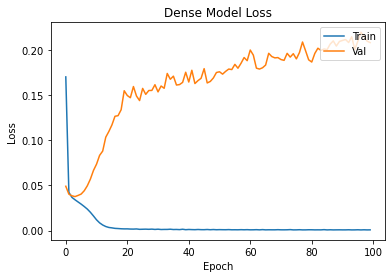

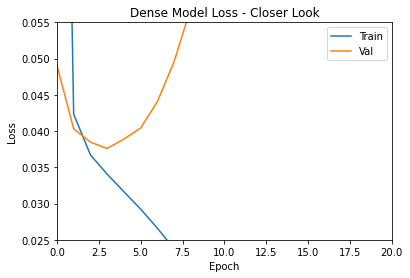

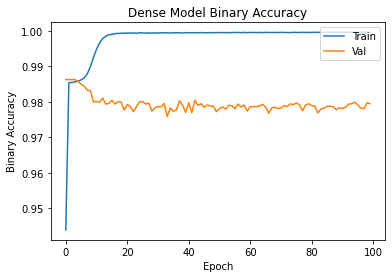

In [24]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.025,0.055)
plt.xlim(0,20)
plt.show()

#Dense Model Binary Accuracy
plt.plot(history_dense.history['binary_accuracy'])
plt.plot(history_dense.history['val_binary_accuracy'])
plt.title('Dense Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

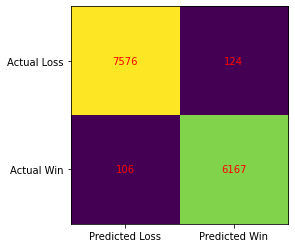

In [46]:
#Confusion matrix for Test set using Dense NN

cm = confusion_matrix(Y_test, dense.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

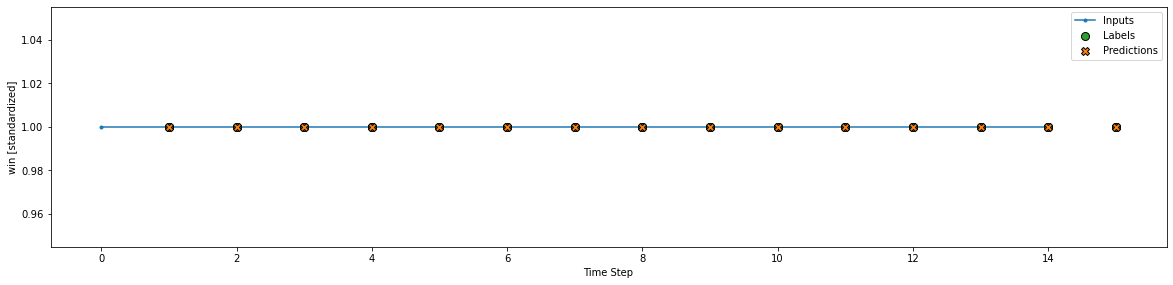

In [25]:
#Dense

wide_window.plot(dense)

In [26]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [27]:
history_lstm = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1397/1397 [==============================] - 8s 6ms/step - loss: 0.1354 - binary_accuracy: 0.9576 - precision_2: 0.9563 - recall_2: 0.9569 - auc_2: 0.9912 - val_loss: 0.0510 - val_binary_accuracy: 0.9848 - val_precision_2: 0.9852 - val_recall_2: 0.9868 - val_auc_2: 0.9981
Epoch 2/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0366 - binary_accuracy: 0.9880 - precision_2: 0.9882 - recall_2: 0.9872 - auc_2: 0.9988 - val_loss: 0.0439 - val_binary_accuracy: 0.9840 - val_precision_2: 0.9863 - val_recall_2: 0.9841 - val_auc_2: 0.9982
Epoch 3/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0245 - binary_accuracy: 0.9915 - precision_2: 0.9915 - recall_2: 0.9912 - auc_2: 0.9994 - val_loss: 0.0507 - val_binary_accuracy: 0.9821 - val_precision_2: 0.9853 - val_recall_2: 0.9815 - val_auc_2: 0.9977
Epoch 4/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0170 - binary_accuracy: 0.9944 - precision_2: 0.9943 - recall_2: 0

Epoch 30/100
1397/1397 [==============================] - 6s 5ms/step - loss: 0.0011 - binary_accuracy: 0.9996 - precision_2: 0.9997 - recall_2: 0.9996 - auc_2: 1.0000 - val_loss: 0.1549 - val_binary_accuracy: 0.9775 - val_precision_2: 0.9789 - val_recall_2: 0.9795 - val_auc_2: 0.9886
Epoch 31/100
1397/1397 [==============================] - 7s 5ms/step - loss: 8.0916e-04 - binary_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997 - auc_2: 1.0000 - val_loss: 0.1618 - val_binary_accuracy: 0.9769 - val_precision_2: 0.9772 - val_recall_2: 0.9800 - val_auc_2: 0.9879
Epoch 32/100
1397/1397 [==============================] - 7s 5ms/step - loss: 9.4839e-04 - binary_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997 - auc_2: 1.0000 - val_loss: 0.1612 - val_binary_accuracy: 0.9764 - val_precision_2: 0.9792 - val_recall_2: 0.9771 - val_auc_2: 0.9881
Epoch 33/100
1397/1397 [==============================] - 7s 5ms/step - loss: 7.3249e-04 - binary_accuracy: 0.9998 - precision_2: 0.99

1397/1397 [==============================] - 7s 5ms/step - loss: 3.5171e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1674 - val_binary_accuracy: 0.9781 - val_precision_2: 0.9806 - val_recall_2: 0.9787 - val_auc_2: 0.9885
Epoch 59/100
1397/1397 [==============================] - 6s 5ms/step - loss: 3.9385e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1776 - val_binary_accuracy: 0.9778 - val_precision_2: 0.9818 - val_recall_2: 0.9770 - val_auc_2: 0.9877
Epoch 60/100
1397/1397 [==============================] - 6s 4ms/step - loss: 4.3362e-04 - binary_accuracy: 0.9998 - precision_2: 0.9998 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1697 - val_binary_accuracy: 0.9785 - val_precision_2: 0.9815 - val_recall_2: 0.9786 - val_auc_2: 0.9882
Epoch 61/100
1397/1397 [==============================] - 6s 4ms/step - loss: 3.2895e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - reca

1397/1397 [==============================] - 6s 4ms/step - loss: 2.5476e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1918 - val_binary_accuracy: 0.9775 - val_precision_2: 0.9807 - val_recall_2: 0.9775 - val_auc_2: 0.9869
Epoch 87/100
1397/1397 [==============================] - 6s 5ms/step - loss: 2.5944e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1890 - val_binary_accuracy: 0.9783 - val_precision_2: 0.9817 - val_recall_2: 0.9780 - val_auc_2: 0.9871
Epoch 88/100
1397/1397 [==============================] - 7s 5ms/step - loss: 2.5077e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - recall_2: 0.9999 - auc_2: 1.0000 - val_loss: 0.1928 - val_binary_accuracy: 0.9777 - val_precision_2: 0.9812 - val_recall_2: 0.9773 - val_auc_2: 0.9868
Epoch 89/100
1397/1397 [==============================] - 6s 5ms/step - loss: 2.2134e-04 - binary_accuracy: 0.9999 - precision_2: 0.9999 - reca

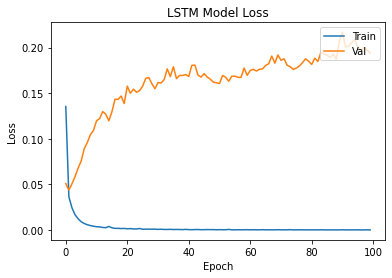

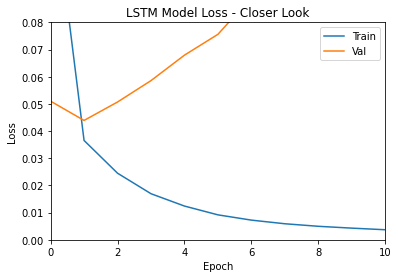

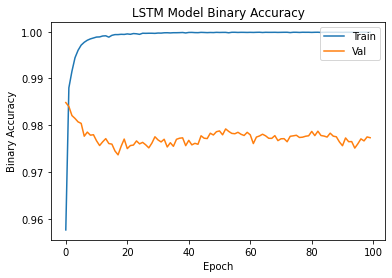

In [28]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0,0.08)
plt.xlim(0,10)
plt.show()

#LSTM Model Binary Accuracy
plt.plot(history_lstm.history['binary_accuracy'])
plt.plot(history_lstm.history['val_binary_accuracy'])
plt.title('LSTM Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

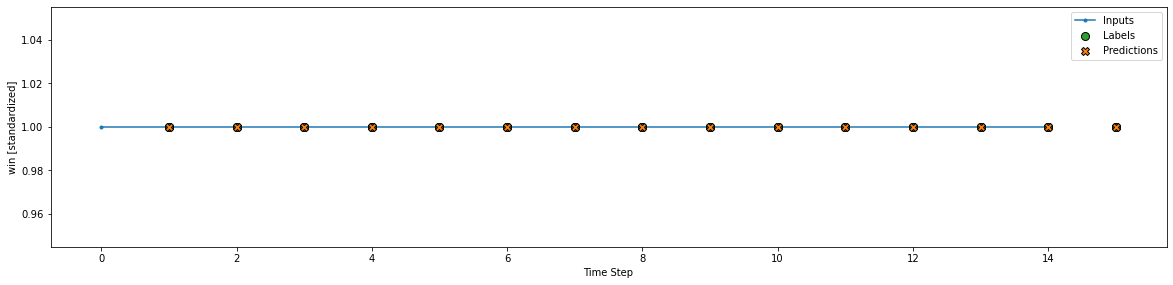

In [29]:
#LSTM

wide_window.plot(lstm_model)

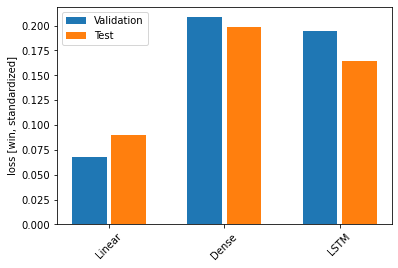

In [30]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()